In [36]:
import numpy as np

from neurodsp.sim import sim_oscillation
from neurodsp.spectral import compute_spectrum

from timescales.sim import sim_ou
from timescales.fit import PSD, ACF
from timescales.fit.utils import convert_knee_val
from timescales.autoreg import compute_ar_spectrum
from timescales.plts import set_default_rc

# PSD Objects

This tutorials explores the use of the PSD objects.

In [226]:
# Settings
n_seconds = 2
fs = 1000
knee_freq = 10
tau = convert_knee_val(knee_freq)
ar_order = 50

# Simulate a signal
np.random.seed(0)
sig = sim_ou(n_seconds, fs, tau, mu=0, std=1)

PSD objects have a compute_spectrum method that may be called from an empty intialization. This method supports neurodsp's compute_spectrum and timescale's compute_ar_spectrum functions. Alternatively, external functions that compute spectra a

In [228]:
# Initialize
psd = PSD()

# Using method
psd.compute_spectrum(sig, fs, ar_order)

# Using external function
freqs, powers = compute_ar_spectrum(sig, fs, ar_order)
psd = PSD(freqs, powers)

### Model

PSD is expected to follow a Lorentzian form, in which log-log power is constant until a knee frequency before decaying.

Once the freqs and powers attributes are defined, the objects is ready to fit. The plot method may be called to visualize the fit in log-log space.

### Optimization

Timescales supports FOOOF models or any loss function supported by scipy.optimize.least_squares:

- `huber`


- `soft_l1`


- `cauchy`


- `arctan`

If a loss function is specified, a single call to scipy's curve fit is used to optimize the aperiodic Lorentzian model. If the FOOOF model calls curve_fit three times for the aperiodic fit, and an additional time for each spectral peak. 

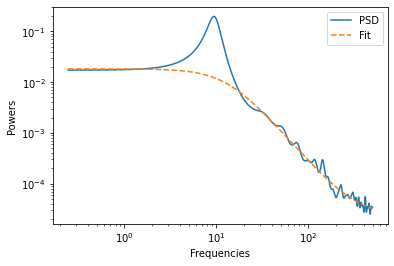

In [225]:
psd.fit(method='cauchy', maxfev=1000, f_scale=1e-2)
psd.plot()

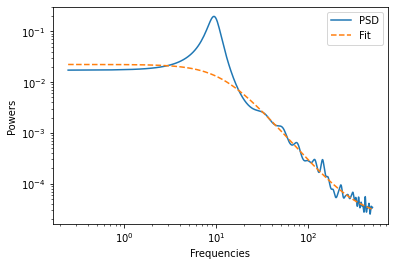

In [182]:
psd.plot()

In [183]:
%%timeit -r 1 -n 1

psd.fit(method='fooof', fooof_init={'max_n_peaks':1})

37.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
psd.fit(method='cauchy', maxfev=1000, bounds=bounds, guess=guess)